# Data Familiarisation

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the train & test dataset intp python env
train_df=pd.read_csv('train_LZdllcl.csv')
test_df=pd.read_csv('test_2umaH9m.csv')

In [3]:
# check the shpae of the dataset for training & testing
print(f"Shape of train dataset:{train_df.shape}")
print(f"Shape of test dataset:{test_df.shape}")

Shape of train dataset:(54808, 14)
Shape of test dataset:(23490, 13)


test data doesn't contains target column.

In [4]:
# familiaries the data- print first 3 rows of the train dataset
train_df.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0


In [5]:
# familiaries the data- print first 3 rows of the test dataset
test_df.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47


In [6]:
# lets check the target column
train_df.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

Note:
We are predicting the value of is_promoted. is_promoted is a binary column. we are predicting whether the value will be zero or one. so its a binary classification problem.

In [7]:
# lets copy the datasets into another variable
train=train_df.copy()
test=test_df.copy()

In [8]:
# lets consider the train data for data exploration 
# chekc the dtypes of the data
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

Note: There are Object & numerical types of column in the dataset.

In [9]:
# check the info about the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


Note:</br>
1. There are missing values in the dataset</br>
2. among the columns, 5 are of object type</br>

In [10]:
# lets check the statistics summary of the dataset-only numerical column
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


Note:<br>
1. the outliers are less in the dataset.

In [11]:
# lets check the null values in the train dataset
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [12]:
# lets check the null values in the test dataset
test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

Note: There are null values present in the dataset. we cannot drop the null vvalues. so will go for imputation method.

In [13]:
# extract object type columns
obj_cols=train.select_dtypes(include='object').columns
print(obj_cols)

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')


# Exploratory data Analysis

Text(0.5, 1.0, 'Distribution of Target column')

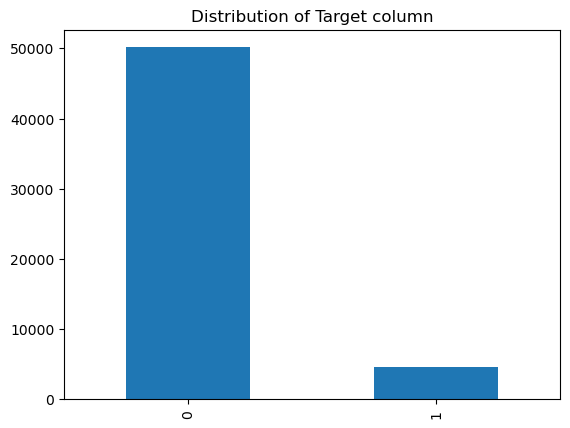

In [14]:
# lets plot the classes weights in target column
train_df.is_promoted.value_counts().plot(kind='bar')
plt.title('Distribution of Target column')

Note: 
Its a imbalanced dataset. we should handle the imbalance datset or use algorithms that can handle the imbalance of the dataset.

C:\Users\Raseena_rasheed\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


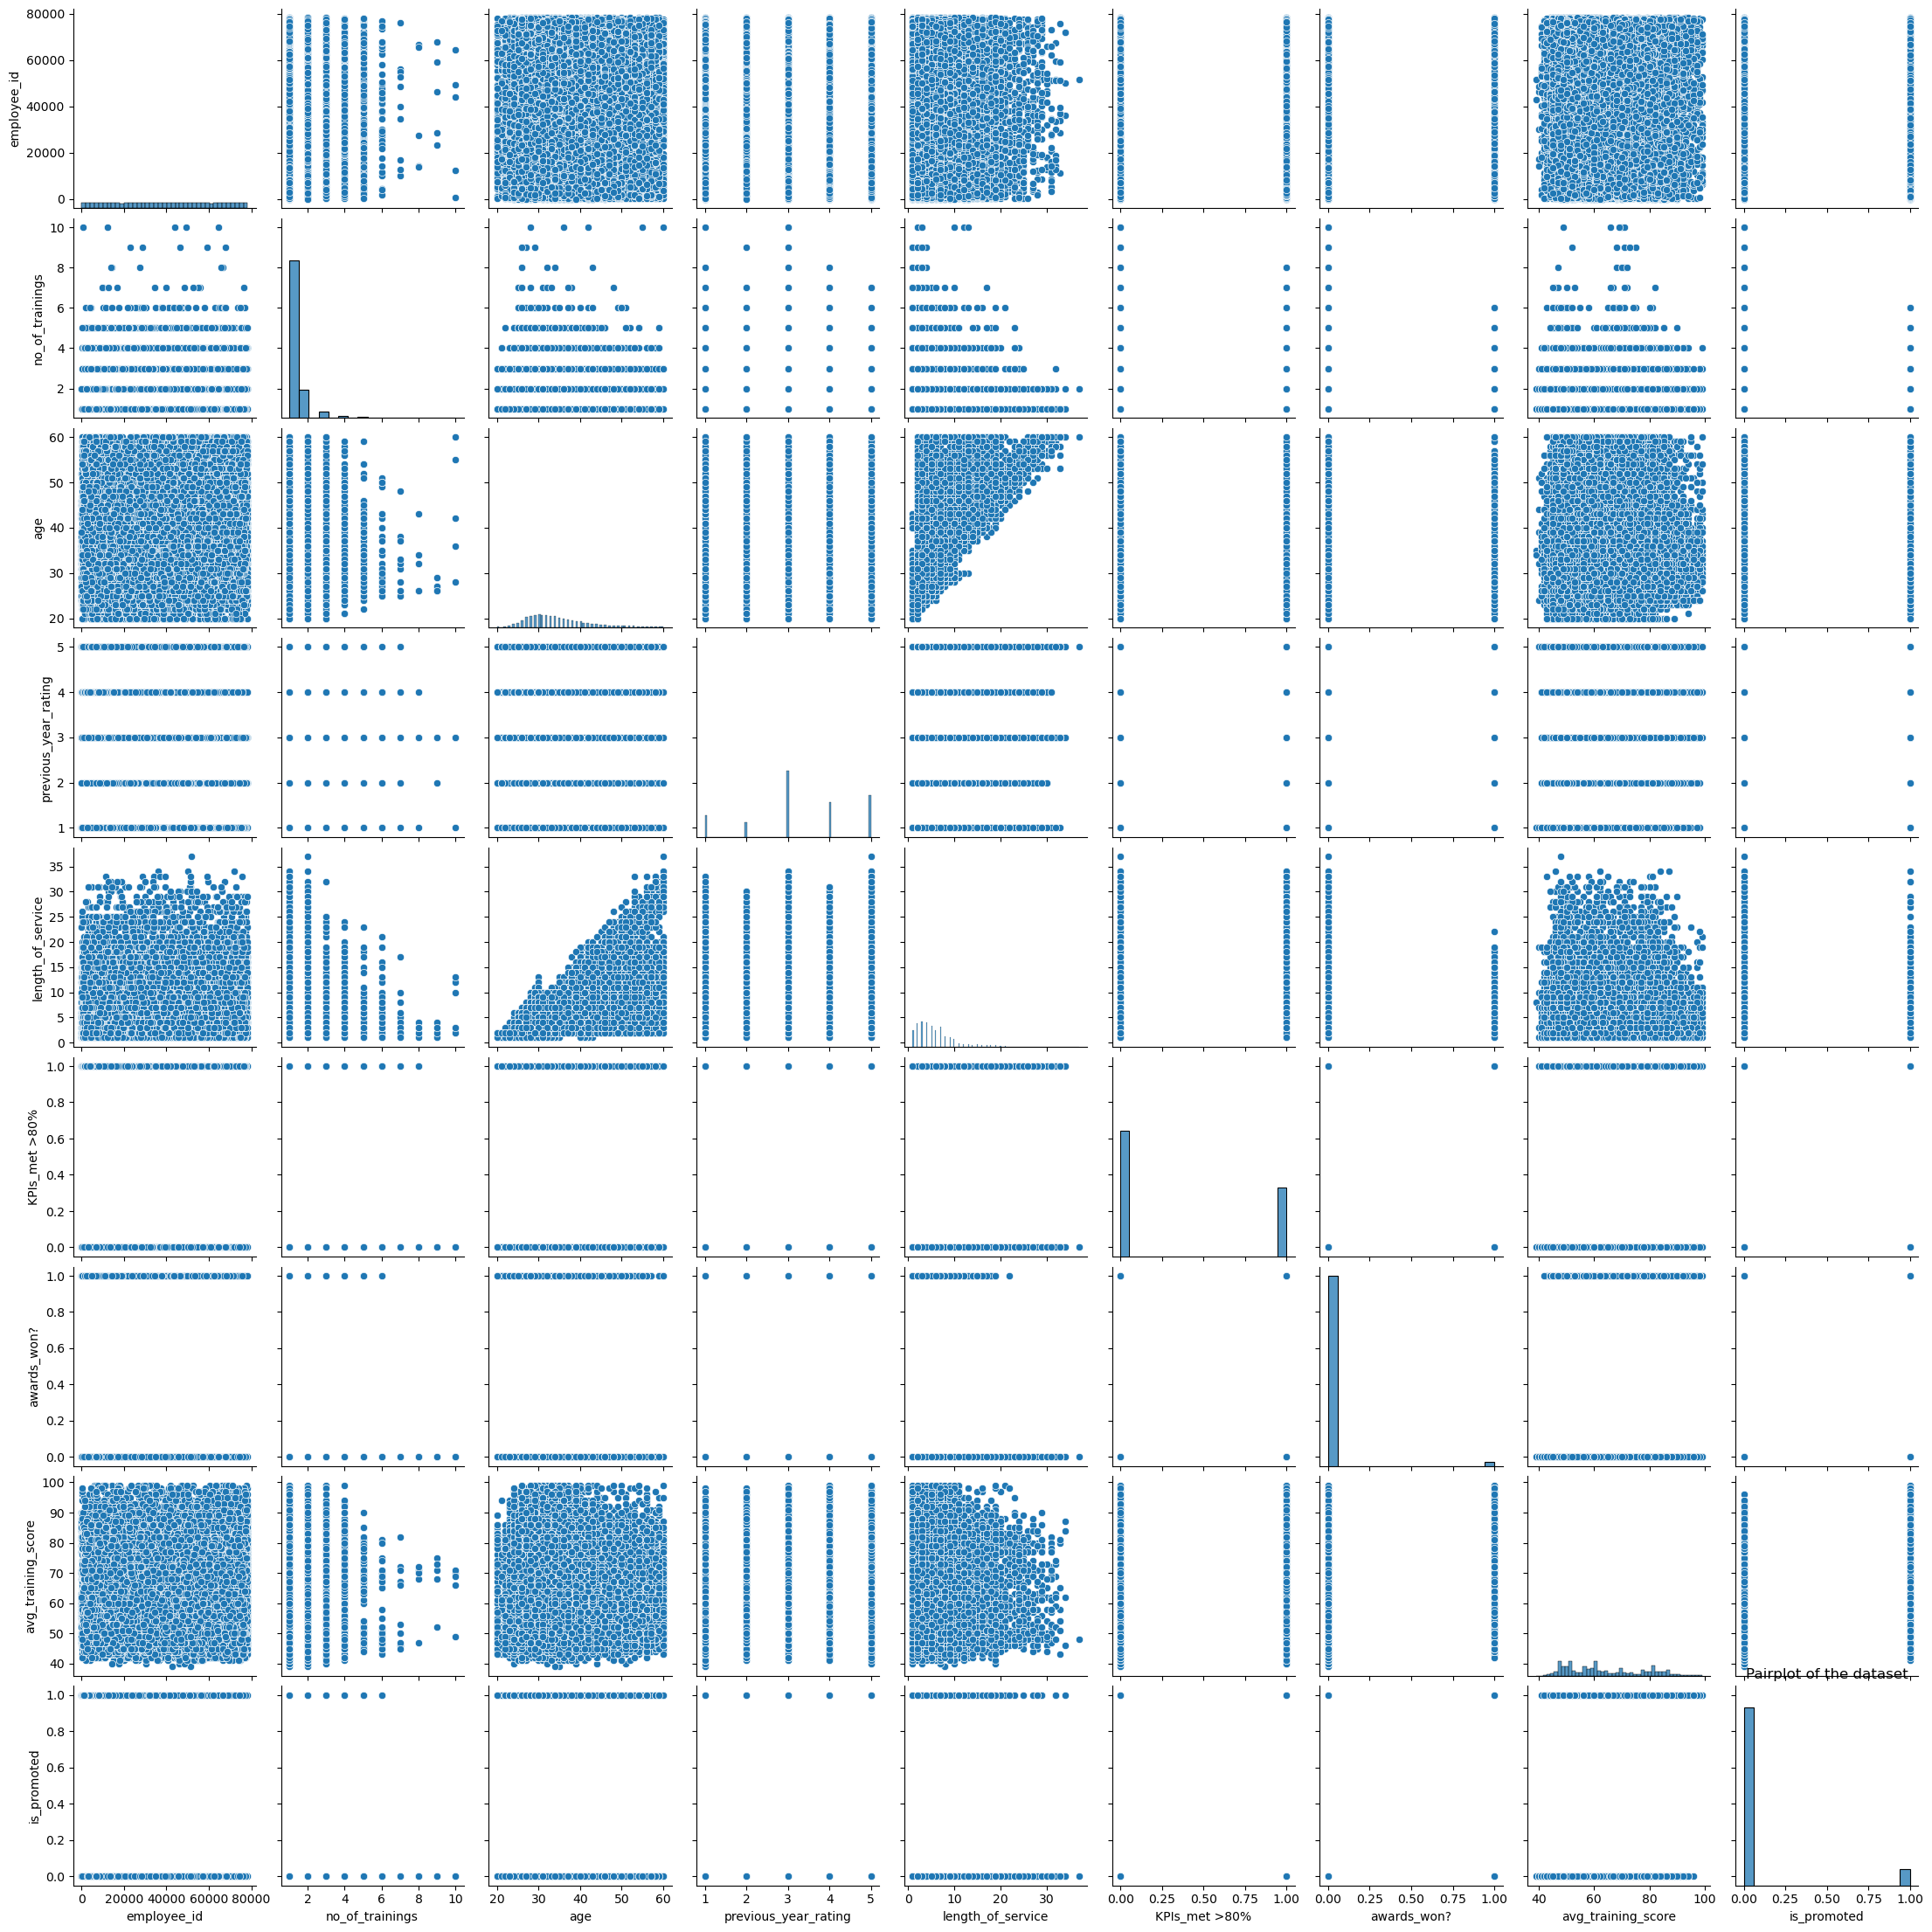

In [15]:
# Lets check the realtion between features using pairplot
sns.pairplot(train)
plt.title('Pairplot of the dataset')
plt.show()

Note:</br>
    1. There are many binary columns & independent features in the dataset.

# Pre-Processing

## 1. Handling of missing value

In [16]:
# 1. handle nll values in the dataset
# from the above , we saw there are missing values in train & test dataset in columns education & previous_year_rating

In [17]:
# values in education column, Its a categorical column
train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [18]:
# lets check the values in department column
train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [19]:
# letr do groupby statement to see if theer any correlation between depatment & education
dept_edu_combo=train.groupby(['department', 'education']).size().reset_index(name='count')

In [20]:
# print the result
print(dept_edu_combo)

           department         education  count
0           Analytics        Bachelor's   3978
1           Analytics  Master's & above   1037
2             Finance        Bachelor's   1895
3             Finance   Below Secondary    106
4             Finance  Master's & above    499
5                  HR        Bachelor's   1525
6                  HR   Below Secondary    128
7                  HR  Master's & above    733
8               Legal        Bachelor's    814
9               Legal   Below Secondary     65
10              Legal  Master's & above    156
11         Operations        Bachelor's   7781
12         Operations   Below Secondary    176
13         Operations  Master's & above   3165
14        Procurement        Bachelor's   4393
15        Procurement   Below Secondary    129
16        Procurement  Master's & above   2544
17                R&D        Bachelor's    542
18                R&D  Master's & above    429
19  Sales & Marketing        Bachelor's  11099
20  Sales & M

In [21]:
# lets drop duplicate values based on department
dept_edu_combo.drop_duplicates('department')

,department,education,count
0,Analytics,Bachelor's,3978
2,Finance,Bachelor's,1895
5,HR,Bachelor's,1525
8,Legal,Bachelor's,814
11,Operations,Bachelor's,7781
14,Procurement,Bachelor's,4393
17,R&D,Bachelor's,542
19,Sales & Marketing,Bachelor's,11099
21,Technology,Bachelor's,4642


Note: from analysing the above, we can go with filling missing value in education column with Bachelor's

In [22]:
# lets analyse the previous_year_rating
train['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

Note: previous_year_rating column is discrete numeric column, we can got for filling with its mode value.

In [23]:
# lets check unique value in employee_id column
train['employee_id'].value_counts()

65438    1
16223    1
38250    1
68086    1
78080    1
        ..
38645    1
76563    1
46788    1
75029    1
51526    1
Name: employee_id, Length: 54808, dtype: int64

Note: from the above we can see that employee_id is unique column in the dataset.

In [24]:
# lets go with mode imputation
train['education'].fillna("Bachelor's", inplace=True)

In [25]:
# lets go with mode imputation
train['previous_year_rating']=train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

In [26]:
# let do the same for test adatset as well
test['education'].fillna("Bachelor's", inplace=True)
test['previous_year_rating']=test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])

# 2. Outliers in the dataset

In [27]:
# first extract cont numeric columns
# for thet lets check the unique values in each column
cols=train.columns
for col in cols:
    print(f"Unique values in {col}: {train[col].nunique()}")

Unique values in employee_id: 54808
Unique values in department: 9
Unique values in region: 34
Unique values in education: 3
Unique values in gender: 2
Unique values in recruitment_channel: 3
Unique values in no_of_trainings: 10
Unique values in age: 41
Unique values in previous_year_rating: 5
Unique values in length_of_service: 35
Unique values in KPIs_met >80%: 2
Unique values in awards_won?: 2
Unique values in avg_training_score: 61
Unique values in is_promoted: 2


Note: from the above list we can see that theer is no continuous numerical colum. all are discrete numerical columns.

In [28]:
# lets plot the age, avg_training_score & length_of_service columsn using boxplot

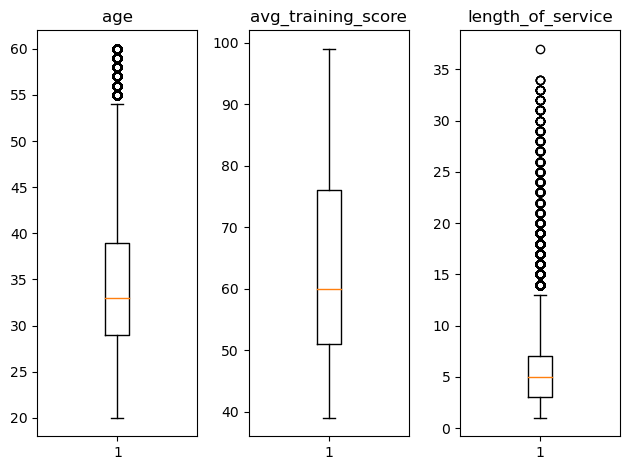

In [29]:
cols=['age','avg_training_score','length_of_service']
plt.subplot(1,3,1)
plt.title('age')
plt.boxplot(train['age'])
plt.subplot(1,3,2)
plt.title('avg_training_score')
plt.boxplot(train['avg_training_score'])
plt.subplot(1,3,3)
plt.title('length_of_service')
plt.boxplot(train['length_of_service'])
plt.tight_layout()

There is no outliers in column avg_training_score.

In [30]:
# lets check the max value of each Age & length_of_service

print('Max value in Age',train['age'].max())
print('Max value in length_of_service',train['length_of_service'].max())

Max value in Age 60
Max value in length_of_service 37


Note: the outliers are of genuine kind. So in this problem, I am not going for outluier handling. will choose an algorithm that are less prone to outliers.

In [32]:
cols=['age','length_of_service']
for i in cols:
    Q1=np.percentile(train[i],25,interpolation='midpoint')
    Q3=np.percentile(train[i],75,interpolation='midpoint')
    IQR=Q3-Q1
    up_lim=Q3+(1.5* IQR)
    low_lim=Q1-(1.5* IQR)
    
    train[i] = np.where(train[i]>up_lim,up_lim,np.where(train[i]<low_lim,low_lim,train[i]))

C:\Users\Raseena_rasheed\AppData\Local\Temp\ipykernel_26988\1827050037.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(train[i],25,interpolation='midpoint')
C:\Users\Raseena_rasheed\AppData\Local\Temp\ipykernel_26988\1827050037.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3=np.percentile(train[i],75,interpolation='midpoint')


In [33]:
cols=['age','length_of_service']
for i in cols:
    Q1=np.percentile(test[i],25,interpolation='midpoint')
    Q3=np.percentile(test[i],75,interpolation='midpoint')
    IQR=Q3-Q1
    up_lim=Q3+(1.5* IQR)
    low_lim=Q1-(1.5* IQR)
    
    test[i] = np.where(test[i]>up_lim,up_lim,np.where(test[i]<low_lim,low_lim,test[i]))

C:\Users\Raseena_rasheed\AppData\Local\Temp\ipykernel_26988\790759118.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(test[i],25,interpolation='midpoint')
C:\Users\Raseena_rasheed\AppData\Local\Temp\ipykernel_26988\790759118.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3=np.percentile(test[i],75,interpolation='midpoint')


# Featute Extraction

In [34]:
# print the columns in the dataset
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [35]:
# the employee_id is a unique column. lets drop the column. becuase it is redudant.
train.drop('employee_id',axis=1,inplace=True)
test.drop('employee_id',axis=1,inplace=True)

# Encoding

In [36]:
# lets do the encoding for bothe train & test dataset
# lets do onehot encoding- it will add binary column based on category value
train=pd.get_dummies(train,drop_first=True,dtype=int)
test=pd.get_dummies(test,drop_first=True,dtype=int)

In [37]:
# lete print the first 3 records of train data
train.head(3)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35.0,5.0,8.0,1,0,49,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,1,30.0,5.0,4.0,0,0,60,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,34.0,3.0,7.0,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [38]:
# lets check the shape of train & test set
print(f"Shape of train dataset:{train_df.shape}")
print(f"Shape of test dataset:{test_df.shape}")

Shape of train dataset:(54808, 14)
Shape of test dataset:(23490, 13)


# Split dataset into dependant & independant fetaures


In [39]:
# lets split the train data into dependant & independant features
from sklearn.model_selection import train_test_split
y=train['is_promoted']
x=train.drop('is_promoted',axis=1)

In [40]:
# split teh data into train & test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Feature Selection

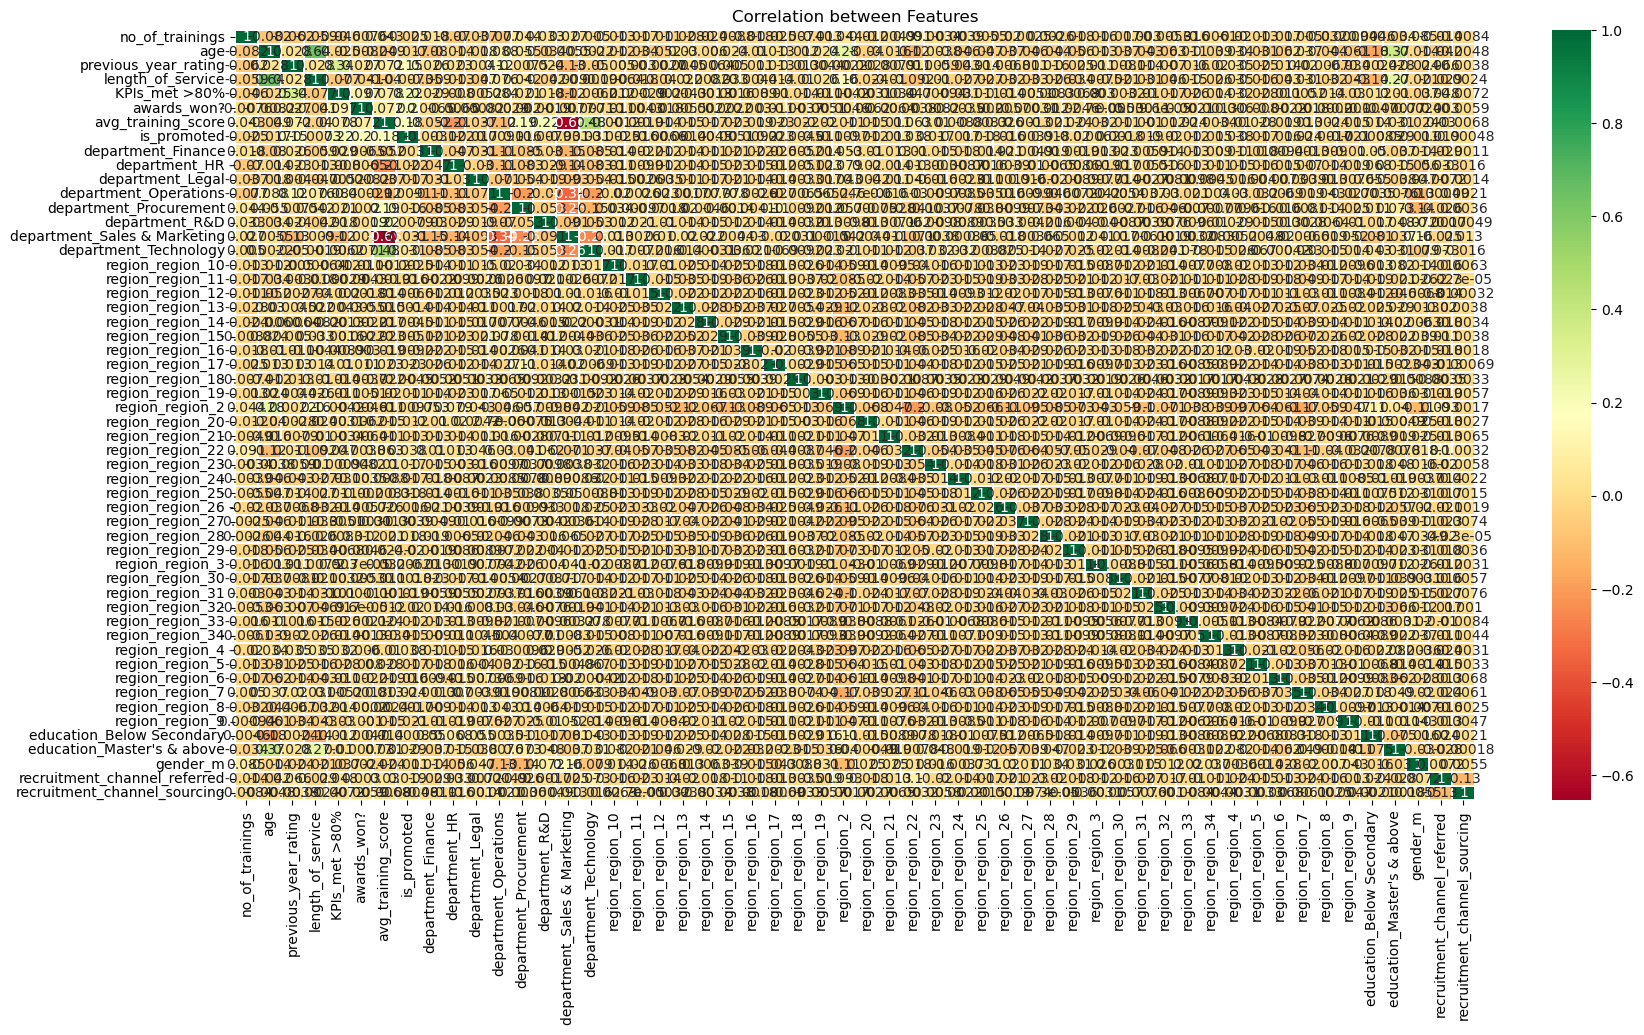

In [41]:
# lets check the correlation between features using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),cmap='RdYlGn',linewidths=0.2,annot=True)
plt.title('Correlation between Features')
plt.show()

Its very hard to get insight from the above plot. but we can see that there are highly correlated fetaures in the dataset.

In [42]:
# lets do the feature slection using RF
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)

importance = clf.feature_importances_

In [43]:
# print the feature imporatnce score
print(importance)

[2.52675565e-02 1.38698816e-01 5.92268887e-02 1.05831633e-01
 4.83365718e-02 3.14000913e-02 3.01989279e-01 8.05104791e-03
 4.80032886e-03 2.76218451e-03 1.84493655e-02 1.28972840e-02
 4.32002809e-03 2.56589211e-02 1.05570471e-02 2.66586808e-03
 3.58562783e-03 1.57016753e-03 7.05530522e-03 3.00541703e-03
 6.84130239e-03 4.41336474e-03 3.76897076e-03 4.44407059e-06
 2.95948781e-03 1.19826730e-02 2.95689441e-03 1.58906840e-03
 8.58014936e-03 4.89847608e-03 1.64445821e-03 3.45017327e-03
 5.51538134e-03 5.10859613e-03 4.41333519e-03 2.73092279e-03
 2.03616395e-03 2.82408777e-03 4.49104381e-03 2.03573527e-03
 9.02889955e-04 6.25108427e-04 5.33375826e-03 2.05680553e-03
 1.94378287e-03 8.70823248e-03 2.66073289e-03 9.20089185e-04
 2.37859782e-03 1.53144131e-02 2.54652712e-02 5.59042836e-03
 2.97257320e-02]


In [44]:
# lets create a datafrae

feature_imp_df=pd.DataFrame(importance, index= x.columns,columns=['importance'])
feature_imp_df.sort_values(by='importance',ascending=False)

,importance
avg_training_score,0.301989
age,0.138699
length_of_service,0.105832
previous_year_rating,0.059227
KPIs_met >80%,0.048337
awards_won?,0.031400
recruitment_channel_sourcing,0.029726
department_Sales & Marketing,0.025659
gender_m,0.025465
no_of_trainings,0.025268


In [45]:
# lets consider first 10 columns
cols_to_consider=feature_imp_df.sort_values(by='importance',ascending=False)[:10].index

Note: we will use only this columns for modeling

# Modeling

Lets compare the performance of different models.</br>

1. Logistic Regression</br>
2. KNN</br>
3. SVM</br>
4. Naive Bayes</br>
5. DecisionTreeClassifier</br>
6. RandomForestClassifier</br>
7. Adaboost</br>

In [46]:
# # import necesary libraries for models & metric eveluation
# evaluation metrics is f1 score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# f1 score is the harmonic mean of precision & recall
from sklearn.metrics import accuracy_score,f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [47]:
x=train[cols_to_consider]
y=train['is_promoted']

In [48]:
# split teh data into train & test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
# lets find optimum value of k in knn
accuracy_score_k=[]
for i in range(3,15):
    knn=KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=2)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    accuracy_score_k.append(accuracy_score(y_test,y_pred))

Text(0.5, 1.0, 'Accuracy score vs k')

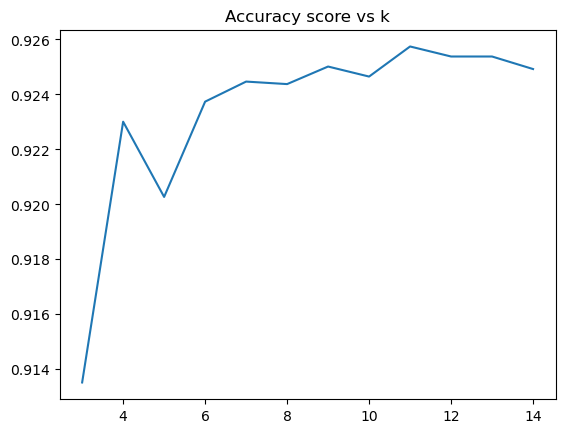

In [50]:
# lets plot the graph to find the k value with high accuracy
plt.plot(range(3,15),accuracy_score_k)
plt.title('Accuracy score vs k')

Note: Accuracy score is high for k=11

In [51]:
# create model's object and store it in a list
lr=LogisticRegression(max_iter=1000)
knn=KNeighborsClassifier(n_neighbors=11,metric='minkowski',p=2)
gb=GaussianNB()
svc=SVC(kernel='linear')
dt=DecisionTreeClassifier(criterion='entropy')
rf=RandomForestClassifier(random_state=42)
ada2=AdaBoostClassifier(random_state=42)

models=[lr,gb,knn,svc,dt,rf,ada2]

In [52]:
# a function to predict & evaluate model performance
def predict_var(model_object):
    model_object.fit(x_train,y_train)
    y_pred=model_object.predict(x_test)
    f1=f1_score(y_test,y_pred)
    
    return f1

In [53]:
# a dictionary to store the model evaluation score
model_performance={}

In [54]:
# calculating the score for each model
for i in models:
    f1=predict_var(i)
    # extracting the model name
    i=str(i).split('(')[0]
    # store the value
    model_performance[i]=f1

In [55]:
# performance score for different model
model_performance

{'LogisticRegression': 0.18725868725868727,
 'GaussianNB': 0.2012037833190026,
 'KNeighborsClassifier': 0.2127659574468085,
 'SVC': 0.0,
 'DecisionTreeClassifier': 0.3459690336358783,
 'RandomForestClassifier': 0.3663890991672975,
 'AdaBoostClassifier': 0.26273458445040215}

Note:The DecisionTreeClassifier and RandomForestClassifier have relatively higher F1 scores. Let go for random Forest Classifier.

# lets do PCA & check the result for RF

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [57]:
# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [58]:
# Apply PCA
pc = PCA(n_components=10)
X_train_pca = pc.fit_transform(x_train_scaled)
X_test_pca = pc.transform(x_test_scaled)

In [59]:
PC_train=pd.DataFrame(X_train_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
PC_test=pd.DataFrame(X_test_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

In [60]:
rf=RandomForestClassifier(random_state=42)
rf.fit(PC_train,y_train)
y_pred=rf.predict(PC_test)
f1=f1_score(y_test,y_pred)

In [61]:
print(f1)

0.3643533123028391


In this problem performace on PCA components don;t have much impact on the model performance.

# Hyper Parameter Tuning for RF model

In [62]:
# Define the parameter grid for hyperparameter tuning
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', 'balanced_subsample', None],
    'random_state': [42]
}

In [63]:
# will use Random search cv for finr tuning
from sklearn.model_selection import RandomizedSearchCV

In [64]:
random_search = RandomizedSearchCV(estimator = RandomForestClassifier(),
                                   param_distributions = params, verbose = 1,
                                   n_jobs = -1, n_iter = 6)
random_result = random_search.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [65]:
random_result.best_params_

{'random_state': 42,
 'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': None,
 'class_weight': None}

In [66]:
random_result.best_score_

0.9312137774655275

In [67]:
# lets do scaling and check the eprformance
from sklearn.preprocessing import StandardScaler,MinMaxScaler

min_max=MinMaxScaler()
x_train_mm=min_max.fit_transform(x_train)
x_test_mm=min_max.fit_transform(x_test)

In [68]:
x_train.shape

(43846, 10)

In [69]:
final_rf=RandomForestClassifier(random_state=42,
                            n_estimators=300,
                            min_samples_split=10,
                            min_samples_leaf=4,
                            max_features='sqrt',
                            max_depth=None,
                            class_weight=None)
final_rf.fit(x_train_mm,y_train)
y_pred=final_rf.predict(x_test_mm)
print(f1_score(y_test,y_pred))

0.37510803802938636


scaling dont have much impact on performance score.

# Final Modeling

In [70]:
test.head(3)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,24.0,3.0,1.0,1,0,77,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1,31.0,3.0,5.0,0,0,51,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,31.0,1.0,4.0,0,0,47,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [71]:
test.shape

(23490, 53)

In [72]:
final_x_test=test[cols_to_consider]

In [73]:
final_rf=RandomForestClassifier(random_state=42,
                            n_estimators=300,
                            min_samples_split=10,
                            min_samples_leaf=4,
                            max_features='sqrt',
                            max_depth=None,
                            class_weight=None)
rf.fit(x_train,y_train)
y_pred=rf.predict(final_x_test)

In [74]:
#read sample dataset
sample=pd.read_csv('sample_submission_M0L0uXE.csv')

In [75]:
sample.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [76]:
sample['is_promoted'].value_counts()

0    23490
Name: is_promoted, dtype: int64

In [77]:
# change the is_promoted columns values to y_pred values

In [78]:
sample['is_promoted']=y_pred

In [79]:
sample['is_promoted'].value_counts()

0    22589
1      901
Name: is_promoted, dtype: int64

In [80]:
# save to csv
sample.to_csv('solution.csv', index=False) 